In [1]:
from fastai2.torch_basics import *
from fastai2.layers import *
from fastai2.data.all import *
from fastai2.data.block import *
from fastai2.optimizer import *
from fastai2.learner import *
from fastai2.metrics import *
from fastai2.vision.core import *
from fastai2.vision.data import *
from fastai2.callback.all import *
from fastai2.vision.all import *

path=untar_data(URLs.IMAGENETTE_320)
files = get_image_files(path)

In [20]:

class DoubleImage(Tuple):
    def show(self, ctx=None, **kwargs): 
        if len(self) == 3:
            img1,img2,title = self
        else:
            img1,img2 = self
            title='NNN/AAA'
        if not isinstance(img1, Tensor):
            if img2.size != img1.size: img2 = img2.resize(img1.size)
            t1,t2 = tensor(img1),tensor(img2)
            t1,t2 = t1.permute(2,0,1),t2.permute(2,0,1)
        else: t1,t2 = img1,img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        line0 = t1.new_ones(t1.shape[0], t1.shape[1], 30)
        line00 = t1.new_ones(t1.shape[0], t1.shape[1], 30)
        
        t2 = t2.long() #NOTE: If not causees an error of type not being long but char (unsigned int??)
        t2 = TensorImage(t2)
        print("*************************************************")
        mix2img = torch.cat([t1, line00, t2], dim=2)
        return show_image(mix2img, title=title, ctx=ctx)

class JustDoDoble(Transform):
    def encodes(self, x:PILImage):
        img2 = x.convert('LA').convert('RGB')
        img2 = PILImage(img2)
        return DoubleImage(x, img2)
    def decodes(self, x): #:TensorImage):
        print(f"decodes of JustDoDouble {type(x)}")
        return x #[0]

class ExtractLeft(Transform):
    def encodes(self, x:DoubleImage):
        return x[0]

class ExtractRigth(Transform):
    def encodes(self, x:DoubleImage):
        return x[0]

imagenet = DataBlock(blocks = (ImageBlock(),CategoryBlock),
                  get_items = get_image_files,
                  splitter = GrandparentSplitter(),
                  item_tfms=[JustDoDoble, CropPad(340), ExtractLeft, ExtractRigth],
                  get_y = parent_label)

imagenet.summary(path)

Setting-up type transforms pipelines
Found 13394 items
2 datasets of sizes 9469,0
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/tyoc213/.fastai/data/imagenette2-320/train/n03028079/n03028079_71737.JPEG
    applying PILBase.create gives
      PILImage mode=RGB size=320x441
  Pipeline: parent_label -> Categorize
    starting from
      /home/tyoc213/.fastai/data/imagenette2-320/train/n03028079/n03028079_71737.JPEG
    applying parent_label gives
      n03028079
    applying Categorize gives
      TensorCategory(4)

Final sample: (PILImage mode=RGB size=320x441, TensorCategory(4))


Setting up after_item: Pipeline: JustDoDoble -> CropPad -> ExtractLeft -> ExtractRigth -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: JustDoDoble -> CropPad -> ExtractLeft -

In [21]:
dls = imagenet.dataloaders(path)
dls.one_batch()

((TensorImage([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
  
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
  
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
    

decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorImage'>
decodes of JustDoDouble <class 'fastai2.torch_core.TensorCategory'>
decodes of

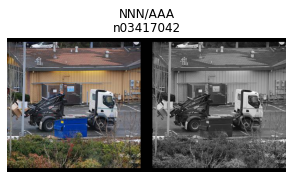

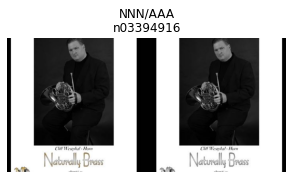

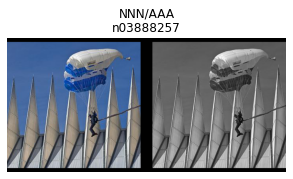

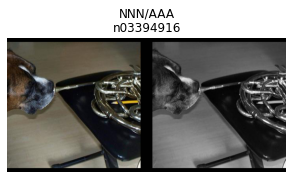

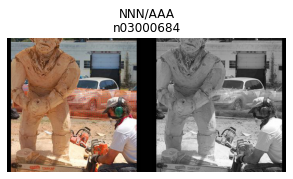

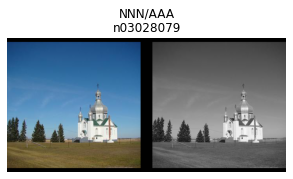

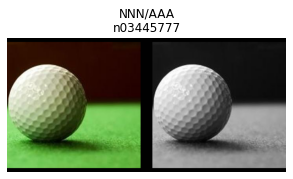

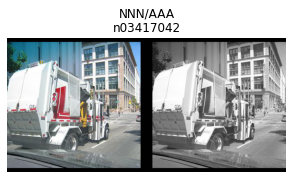

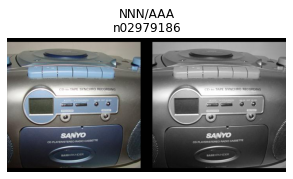

In [22]:
dls.show_batch()

In [23]:
#Not using ys, as we want to preserve the labels in outputs and foir interpretability, not training. 
class SimilarityLoss:
    def __call__(self,preds,ys):
        self.bs2=len(preds) #twice the bs
        sij=self._similarity(preds)
        pairs=self._pairs(self.bs2,preds.device)
        return F.cross_entropy(sij,pairs)
    def _similarity(self,preds):
        device=preds.device
        bs2=self.bs2
        mask=torch.ones(bs2,bs2,device=device)-torch.eye(bs2,device=device)
        sij = torch.cosine_similarity(preds[:,None].repeat(1,bs2,1),preds[None].repeat(bs2,1,1),dim=2)
        return sij*mask
    def _pairs(self,bs,device):
        return torch.flatten(torch.arange(1,self.bs2,2,device=device)[...,None].repeat(1,2)
                             -torch.tensor([0,1],dtype=torch.long,device=device))
    def activation(self,preds):
        self.bs2=len(preds)
        sij=self._similarity(preds)
        return F.softmax(preds,dim=1)
    def decodes(self,acts):
        return acts.max(dim=1)[1]

learn=cnn_learner(dls,resnet18,SimilarityLoss(),pretrained=False,n_out=16)

In [24]:
learn.fit(1,lr=0.02)

TypeError: conv2d(): argument 'input' (position 1) must be Tensor, not DoubleImage

In [ ]:
learn=cnn_learner(dls,resnet18)
learn.fit(1,lr=0.02)

In [ ]:
learn.